This notebook analyses the behaviour and parameter space of nine unique agents.

In [1]:
import sys,os
os.chdir(globals()['_dh'][0])
os.chdir("../")
BaseDirectory = os.getcwd()

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import DataHandler
import importlib
importlib.reload(DataHandler)

from DataHandler import *

# Behaviour

Load Data

In [2]:
# load activation and plot data for all agents
# this cell takes ~100s to evaluate
unq = []
for a in range(9):
    unq.append(Data(BaseDirectory,maxP=2,popidx=a+1,perm=[0]))
    for p in [1,3]:
        unq[a].LoadSenderActivation(perm=p,phase=1)
        unq[a].LoadSenderActivation(perm=p,phase=2)
        unq[a].LoadReceiverActivation(perm=p,phase=2)
        unq[a].LoadReceiverActivation(perm=p,phase=3)
        unq[a].LoadSenderPosition2D(perm=p,phase=1)
        unq[a].LoadSenderPosition2D(perm=p,phase=2)
        unq[a].LoadReceiverPosition2D(perm=p,phase=2)
        unq[a].LoadReceiverPosition2D(perm=p,phase=3)
        unq[a].LoadPosts2D(perm=p,phase=1)
        unq[a].LoadPosts2D(perm=p,phase=3)
        unq[a].LoadContact2D(perm=p,phase=1)
        unq[a].LoadContact2D(perm=p,phase=2)
        unq[a].LoadContact2D(perm=p,phase=3)
    # additional permutations for search phase
    for p in [2,4]:
        unq[a].LoadReceiverPosition2D(perm=p,phase=3)
        unq[a].LoadReceiverActivation(perm=p,phase=3)
        unq[a].LoadContact2D(perm=p,phase=3)
        unq[a].LoadPosts2D(perm=p,phase=3)

### Visual Summary of Communication Strategies

#### Position Activation Correspondence

Senders in Phase 1

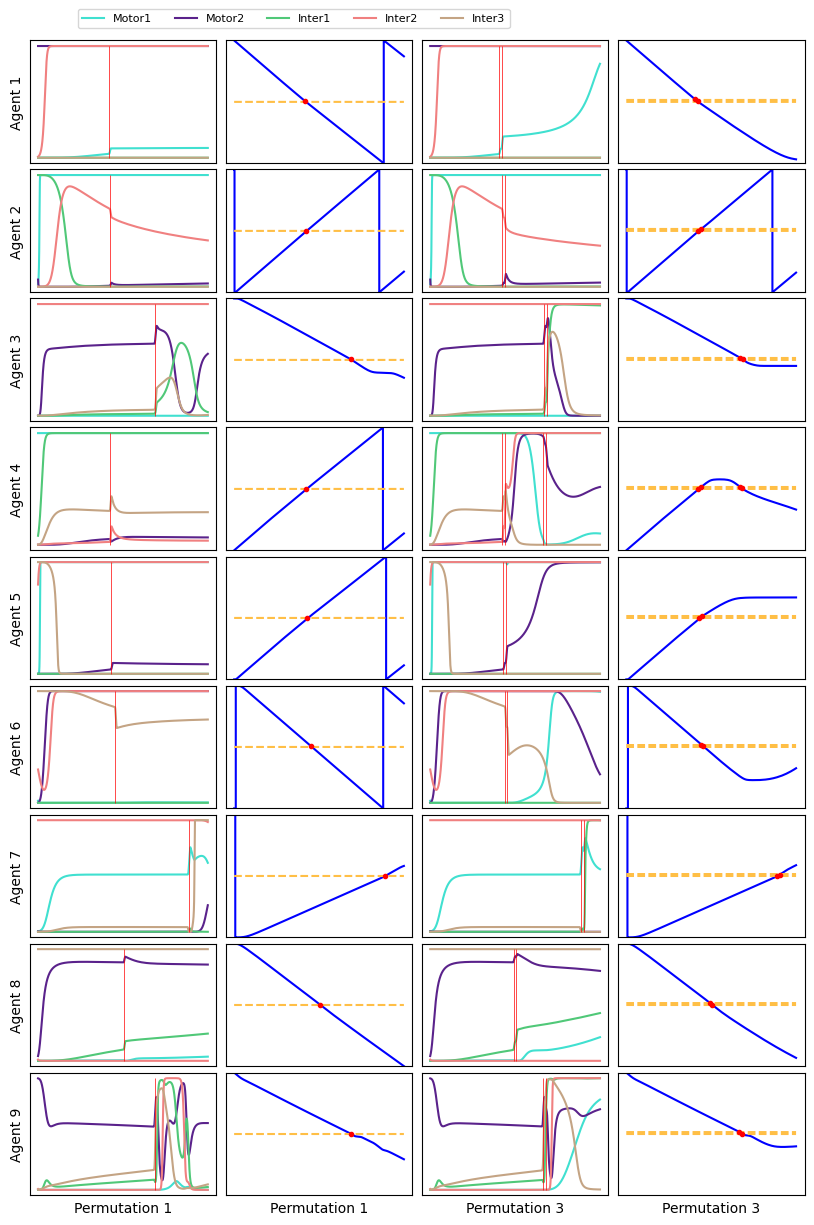

In [3]:
fig, axs = plt.subplots(9,4,figsize=(10,15),sharey="col",sharex="all")

for a in range(9):
    axs[a,0] = unq[a].PlotSenderActivation(axs[a,0],perm=1,phase=1)
    axs[a,0].vlines(unq[a].ContactPoints2D[0][0].get_path().vertices[:,0],0,1,colors=[1,0,0],linewidth=.5)
    axs[a,1] = unq[a].PlotSenderPosition2D(axs[a,1],perm=1,phase=1)
    axs[a,1] = unq[a].PlotPosts2D(axs[a,1],perm=1,phase=1)
    axs[a,1] = unq[a].PlotContact2D(axs[a,1],perm=1,phase=1)
    axs[a,1].set_ylim([0,200*np.pi])
    
    axs[a,2] = unq[a].PlotSenderActivation(axs[a,2],perm=3,phase=1)
    axs[a,2].vlines(unq[a].ContactPoints2D[2][0].get_path().vertices[:,0],0,1,colors=[1,0,0],linewidth=.5)
    axs[a,3] = unq[a].PlotSenderPosition2D(axs[a,3],perm=3,phase=1)
    axs[a,3] = unq[a].PlotPosts2D(axs[a,3],perm=3,phase=1)
    axs[a,3] = unq[a].PlotContact2D(axs[a,3],perm=3,phase=1)
    axs[a,3].set_ylim([0,200*np.pi])
    
    axs[a,0].set_ylabel("Agent "+str(a+1))

axs[0,0].set_yticks([])
axs[0,1].set_yticks([])
axs[0,2].set_yticks([])
axs[0,3].set_yticks([])
axs[8,0].set_xticks([])
axs[0,2].legend(bbox_to_anchor=[0.5,1.3],ncols=5,fontsize=8)
axs[8,0].set_xlabel("Permutation 1")
axs[8,1].set_xlabel("Permutation 1")
axs[8,2].set_xlabel("Permutation 3")
axs[8,3].set_xlabel("Permutation 3")

fig.subplots_adjust(wspace=.05,hspace=.05)
plt.show()

Receivers in Phase 2

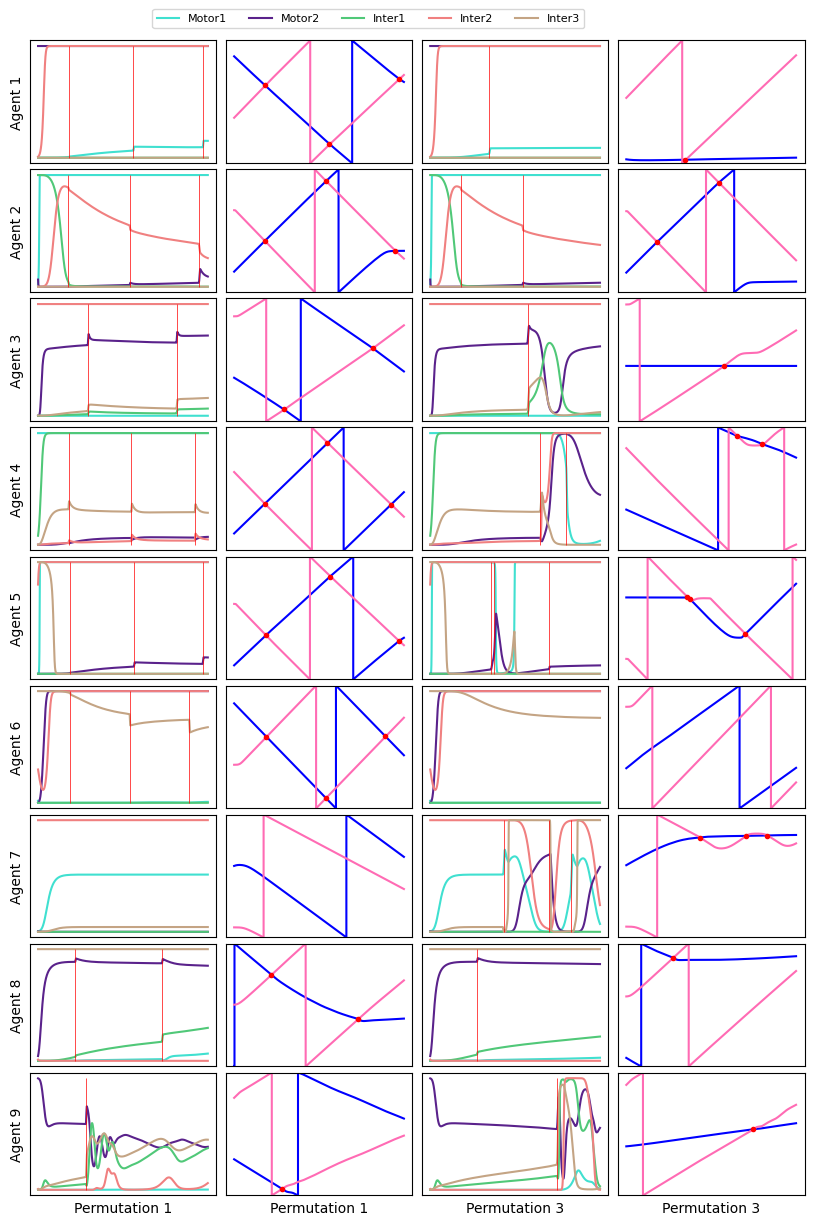

In [4]:
fig, axs = plt.subplots(9,4,figsize=(10,15),sharey="col",sharex="all")

for a in range(9):
    axs[a,0] = unq[a].PlotReceiverActivation(axs[a,0],perm=1,phase=2)
    axs[a,0].vlines(unq[a].ContactPoints2D[0][1].get_path().vertices[:,0],0,1,colors=[1,0,0],linewidth=.5)
    axs[a,1] = unq[a].PlotSenderPosition2D(axs[a,1],perm=1,phase=2)
    axs[a,1] = unq[a].PlotReceiverPosition2D(axs[a,1],perm=1,phase=2)
    axs[a,1] = unq[a].PlotContact2D(axs[a,1],perm=1,phase=2)
    
    axs[a,2] = unq[a].PlotReceiverActivation(axs[a,2],perm=3,phase=2)
    axs[a,2].vlines(unq[a].ContactPoints2D[2][1].get_path().vertices[:,0],0,1,colors=[1,0,0],linewidth=.5)
    axs[a,3] = unq[a].PlotSenderPosition2D(axs[a,3],perm=3,phase=2)
    axs[a,3] = unq[a].PlotReceiverPosition2D(axs[a,3],perm=3,phase=2)
    axs[a,3] = unq[a].PlotContact2D(axs[a,3],perm=3,phase=2)

    axs[a,0].set_ylabel("Agent "+str(a+1))

axs[0,1].set_ylim([0,200*np.pi])
axs[0,3].set_ylim([0,200*np.pi])
axs[0,0].set_yticks([])
axs[0,1].set_yticks([])
axs[0,2].set_yticks([])
axs[0,3].set_yticks([])
axs[8,0].set_xticks([])
axs[0,2].legend(bbox_to_anchor=[.9,1.3],ncols=5,fontsize=8)
axs[8,0].set_xlabel("Permutation 1")
axs[8,1].set_xlabel("Permutation 1")
axs[8,2].set_xlabel("Permutation 3")
axs[8,3].set_xlabel("Permutation 3")

fig.subplots_adjust(wspace=.05,hspace=.05)
plt.show()

Senders in Phase 2

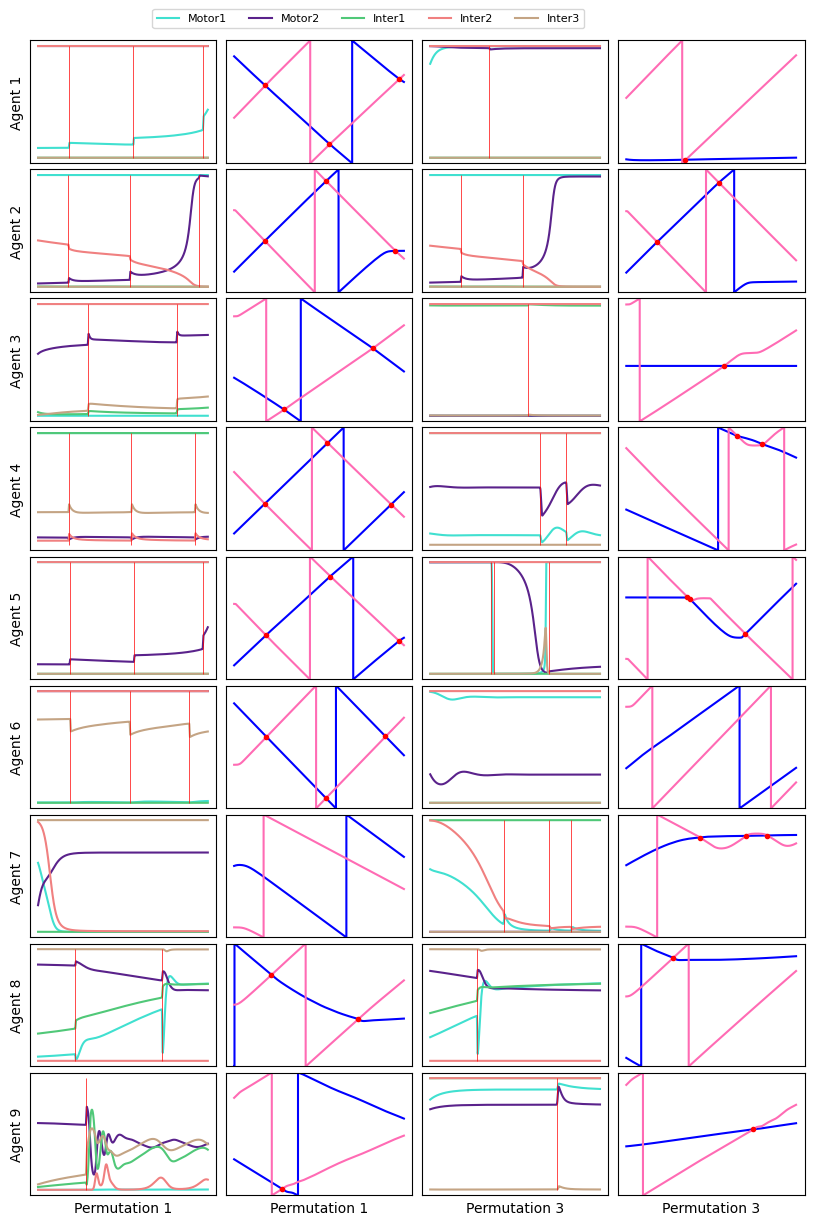

In [5]:
fig, axs = plt.subplots(9,4,figsize=(10,15),sharey="col",sharex="all")

for a in range(9):
    axs[a,0] = unq[a].PlotSenderActivation(axs[a,0],perm=1,phase=2)
    axs[a,0].vlines(unq[a].ContactPoints2D[0][1].get_path().vertices[:,0],0,1,colors=[1,0,0],linewidth=.5)
    axs[a,1] = unq[a].PlotSenderPosition2D(axs[a,1],perm=1,phase=2)
    axs[a,1] = unq[a].PlotReceiverPosition2D(axs[a,1],perm=1,phase=2)
    axs[a,1] = unq[a].PlotContact2D(axs[a,1],perm=1,phase=2)
    
    axs[a,2] = unq[a].PlotSenderActivation(axs[a,2],perm=3,phase=2)
    axs[a,2].vlines(unq[a].ContactPoints2D[2][1].get_path().vertices[:,0],0,1,colors=[1,0,0],linewidth=.5)
    axs[a,3] = unq[a].PlotSenderPosition2D(axs[a,3],perm=3,phase=2)
    axs[a,3] = unq[a].PlotReceiverPosition2D(axs[a,3],perm=3,phase=2)
    axs[a,3] = unq[a].PlotContact2D(axs[a,3],perm=3,phase=2)

    axs[a,0].set_ylabel("Agent "+str(a+1))

axs[0,1].set_ylim([0,200*np.pi])
axs[0,3].set_ylim([0,200*np.pi])
axs[0,0].set_yticks([])
axs[0,1].set_yticks([])
axs[0,2].set_yticks([])
axs[0,3].set_yticks([])
axs[8,0].set_xticks([])
axs[0,2].legend(bbox_to_anchor=[.9,1.3],ncols=5,fontsize=8)
axs[8,0].set_xlabel("Permutation 1")
axs[8,1].set_xlabel("Permutation 1")
axs[8,2].set_xlabel("Permutation 3")
axs[8,3].set_xlabel("Permutation 3")

fig.subplots_adjust(wspace=.05,hspace=.05)
plt.show()

Receivers in Phase 3

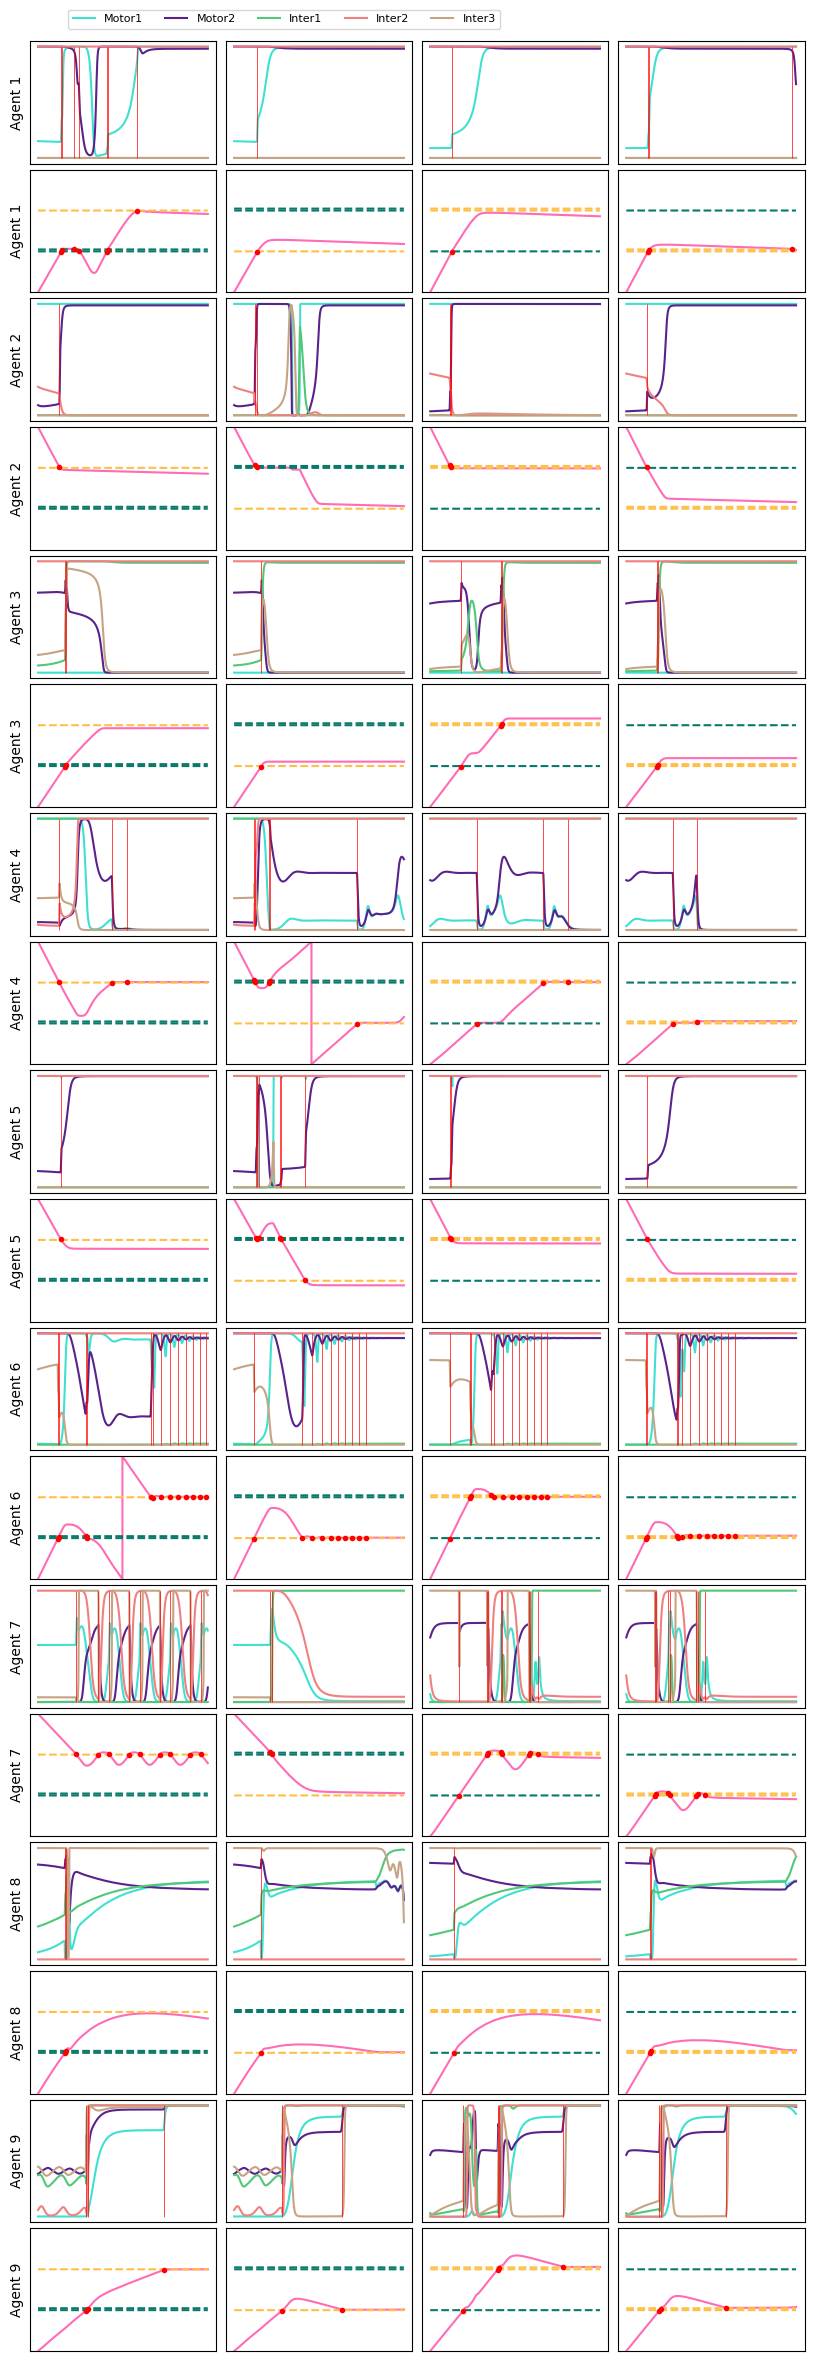

In [6]:
fig, axs = plt.subplots(18,4,figsize=(10,30),sharey="row",sharex="all")

for a in range(9):
    axs[2*a,0] = unq[a].PlotReceiverActivation(axs[2*a,0],perm=1,phase=3)
    axs[2*a,0].vlines(unq[a].ContactPoints2D[0][2].get_path().vertices[:,0],0,1,colors=[1,0,0],linewidth=.5)
    axs[2*a,1] = unq[a].PlotReceiverActivation(axs[2*a,1],perm=2,phase=3)
    axs[2*a,1].vlines(unq[a].ContactPoints2D[1][2].get_path().vertices[:,0],0,1,colors=[1,0,0],linewidth=.5)
    
    axs[2*a,2] = unq[a].PlotReceiverActivation(axs[2*a,2],perm=3,phase=3)
    axs[2*a,2].vlines(unq[a].ContactPoints2D[2][2].get_path().vertices[:,0],0,1,colors=[1,0,0],linewidth=.5)
    axs[2*a,3] = unq[a].PlotReceiverActivation(axs[2*a,3],perm=4,phase=3)
    axs[2*a,3].vlines(unq[a].ContactPoints2D[3][2].get_path().vertices[:,0],0,1,colors=[1,0,0],linewidth=.5)
    
    for i in range(4):
        axs[2*a+1,i] = unq[a].PlotReceiverPosition2D(axs[2*a+1,i],perm=i+1,phase=3)
        axs[2*a+1,i] = unq[a].PlotPosts2D(axs[2*a+1,i],perm=i+1,phase=3)
        axs[2*a+1,i] = unq[a].PlotContact2D(axs[2*a+1,i],perm=i+1,phase=3)
    axs[2*a+0,0].set_yticks([])
    axs[2*a+1,0].set_ylim([0,200*np.pi])
    axs[2*a+1,0].set_yticks([])
    
    axs[2*a,0].set_ylabel("Agent "+str(a+1))
    axs[2*a+1,0].set_ylabel("Agent "+str(a+1))

axs[0,0].set_xticks([])
axs[0,1].legend(bbox_to_anchor=[1.5,1.3],ncols=5,fontsize=8)
axs[8,0].set_xlabel("Permutation 1")
axs[8,1].set_xlabel("Permutation 2")
axs[8,2].set_xlabel("Permutation 3")
axs[8,3].set_xlabel("Permutation 4")

fig.subplots_adjust(wspace=.05,hspace=.05)
plt.show()

### Communication Analysis

Communication Patterns in $S\in\{2,5,8\}$

In [7]:
agents = []
i = 0
for a in [2,5,8]:
    agents.append(Data(BaseDirectory,maxP=2,popidx=a,perm=[1,3]))
    agents[i].LoadContact2D(perm=1,phase=2)
    agents[i].LoadContact2D(perm=3,phase=2)

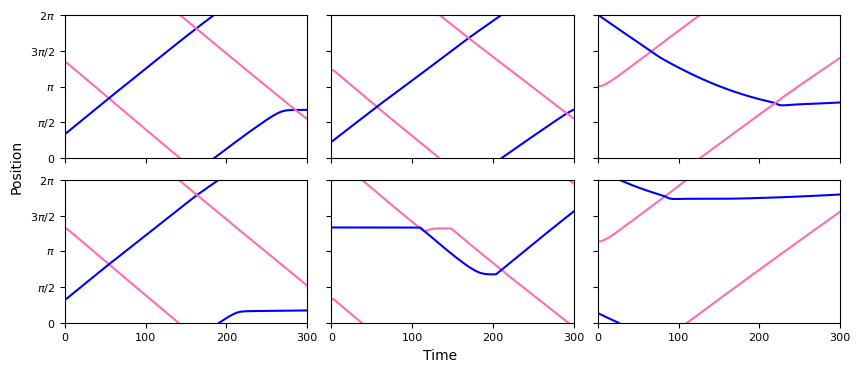

In [8]:
fig, axs = plt.subplots(2,3,figsize=(10,4),sharex="all",sharey="all")

err = .04
i = 0
for a in agents:
    for p in range(2):
        ax = axs[p,i]
        prev_s = 0
        prev_r = 0
        s = a.Sender[p][1]["Position"]
        r = a.Receiver[p][0]["Position"]
        time = a.Time[1]
        for t in range(len(time)):
            if s[t] < err or s[t] > np.pi*200-err:
                ax.add_line(Line2D(time[prev_s:t-1],s[prev_s:t-1],c=[0,0,1]))
                # ax.vlines(time[t],0,200*np.pi,colors=[0,0,1],linestyles=':')
                prev_s = t+1
            if r[t] < err or r[t] > np.pi*200-err:
                ax.add_line(Line2D(time[prev_r:t-1],r[prev_r:t-1],c=[1,.418,.706]))
                # ax.vlines(time[t],0,200*np.pi,colors=[1,.418,.706],linestyles=':')
                prev_r = t+1
            continue
        ax.add_line(Line2D(time[prev_s:t],s[prev_s:t],c=[0,0,1]))
        ax.add_line(Line2D(time[prev_r:t],r[prev_r:t],c=[1,.418,.706]))
        # ax = a.PlotContact2D(ax,perm=1+2*p,phase=2)

    i += 1

axs[0,0].set_ylim(0,200*np.pi)

for i in range(3):
    axs[1,i].set_xticks(np.arange(0,301,100),
        labels=np.arange(0,301,100),fontsize=8)

axs[0,0].set_yticks(np.linspace(0,200*np.pi,5),
    labels=["$0$","$\pi/2$","$\pi$","$3\pi/2$","$2\pi$"],
    fontsize=8)
axs[1,0].set_yticks(np.linspace(0,200*np.pi,5),
    labels=["$0$","$\pi/2$","$\pi$","$3\pi/2$","$2\pi$"],
    fontsize=8)


fig.supxlabel("Time",fontsize=10)
fig.supylabel("Position",fontsize=10,x=.07)
fig.subplots_adjust(hspace=.15,wspace=.1)

# os.chdir(BaseDirectory)
# fig.savefig(fname="./Plots/s258-position.pdf",format="pdf",bbox_inches='tight',dpi=600)
# fig.savefig(fname="./Plots/s258-position.jpeg",bbox_inches='tight',dpi=600)
plt.show()

Intricate Interaction in $S=5$

In [9]:
# load data
s5 = Data(BaseDirectory,maxP=2,popidx=5,perm=[1,3])
s5.LoadSenderPosition2D(perm=3,phase=2)
s5.LoadReceiverPosition2D(perm=3,phase=2)

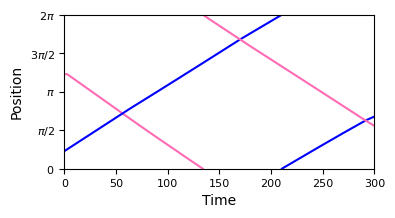

In [10]:
# permutation 1

fig = plt.figure(figsize=(4,2))

ax = fig.add_subplot(1,1,1)
err = .04
prev_s = 0
prev_r = 0
s = s5.Sender[0][1]["Position"]
r = s5.Receiver[0][0]["Position"]
time = s5.Time[1]
for t in range(len(time)):
    if s[t] < err or s[t] > np.pi*200-err:
        ax.add_line(Line2D(time[prev_s:t-1],s[prev_s:t-1],c=[0,0,1]))
        prev_s = t+1
    if r[t] < err or r[t] > np.pi*200-err:
        ax.add_line(Line2D(time[prev_r:t-1],r[prev_r:t-1],c=[1,.418,.706]))
        prev_r = t+1
    continue
ax.add_line(Line2D(time[prev_s:t],s[prev_s:t],c=[0,0,1]))
ax.add_line(Line2D(time[prev_r:t],r[prev_r:t],c=[1,.418,.706]))

ax.set_xticks(np.arange(0,301,50))
ax.set_yticks(np.linspace(0,200*np.pi,5),
    labels=["$0$","$\pi/2$","$\pi$","$3\pi/2$","$2\pi$"],
    fontsize=8)
ax.tick_params(labelsize=8)
ax.set_xlabel("Time",fontsize=10)
ax.set_ylabel("Position",fontsize=10)

# os.chdir(BaseDirectory)
# fig.savefig('./Plots/S5-p1-position.pdf',format="pdf",bbox_inches="tight",dpi=600)
# fig.savefig('./Plots/S5-p1-position.jpeg',bbox_inches="tight",dpi=600)
plt.show()

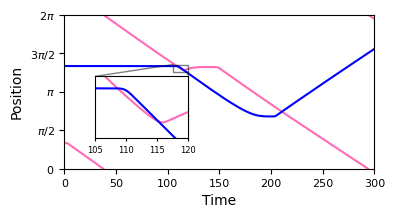

In [11]:
# permutation 3

fig = plt.figure(figsize=(4,2))

ax = fig.add_subplot(1,1,1)
prev_s = 0
prev_r = 0
s = s5.Sender[1][1]["Position"]
r = s5.Receiver[1][0]["Position"]
time = s5.Time[1]
for t in range(len(time)):
    if s[t] < err or s[t] > np.pi*200-err:
        ax.add_line(Line2D(time[prev_s:t-1],s[prev_s:t-1],c=[0,0,1]))
        prev_s = t+1
    if r[t] < err or r[t] > np.pi*200-err:
        ax.add_line(Line2D(time[prev_r:t-1],r[prev_r:t-1],c=[1,.418,.706]))
        prev_r = t+1
    continue
ax.add_line(Line2D(time[prev_s:t],s[prev_s:t],c=[0,0,1]))
ax.add_line(Line2D(time[prev_r:t],r[prev_r:t],c=[1,.418,.706]))

axz = ax.inset_axes([.1,.2,.3,.4])
axz = s5.PlotReceiverPosition2D(axz,perm=3,phase=2)
axz = s5.PlotSenderPosition2D(axz,perm=3,phase=2)
axz.set_ylim(395,425)
axz.set_xlim(105,120)
axz.set_yticks([])
axz.set_xticks(np.arange(105,121,5))
axz.tick_params(labelsize=6,length=2)

ax.indicate_inset_zoom(axz, edgecolor="black")

ax.set_xticks(np.arange(0,301,50))
ax.set_yticks(np.linspace(0,200*np.pi,5),
    labels=["$0$","$\pi/2$","$\pi$","$3\pi/2$","$2\pi$"],
    fontsize=8)
ax.tick_params(labelsize=8)
ax.set_xlabel("Time",fontsize=10)
ax.set_ylabel("Position",fontsize=10)

# os.chdir(BaseDirectory)
# fig.savefig('./Plots/S5-p3-position.pdf',format="pdf",bbox_inches="tight",dpi=600)
# fig.savefig('./Plots/S5-p3-position.jpeg',bbox_inches="tight",dpi=600)
plt.show()

#### Solutions by Contact and Type

In [12]:
# load data for each population
pop = []
for a in range(9):
    pop.append(Data(BaseDirectory,maxP=2,popidx=a+1,perm=[1,3]))
    pop[a].LoadContact2D(perm=1,phase=2)
    pop[a].LoadContact2D(perm=3,phase=2)

In [13]:
# extracting contact points
p1_contact = []
p2_contact = []
for p in pop:
      p1_contact.append(len(p.ContactPoints2D[0][1].get_path()))
      p2_contact.append(len(p.ContactPoints2D[1][1].get_path()))

p1_contact = np.array(p1_contact)
p2_contact = np.array(p2_contact)
print(p1_contact)
print(p2_contact)

[3 3 2 3 3 3 0 2 1]
[1 2 1 2 3 0 3 1 1]


Histogram of Contact

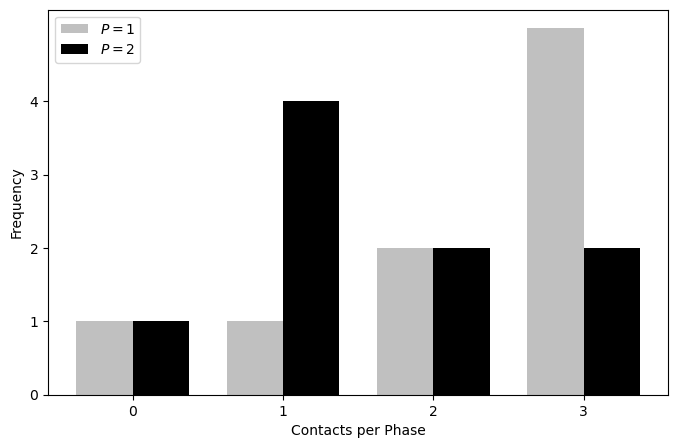

In [14]:
# histogram of contact count by phase
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.hist([p1_contact,p2_contact],bins=4,range=(0,4),align='left',rwidth=.75,
        color=['silver','k'],label=["$P=1$","$P=2$"]
        )
ax.set_xticks([0,1,2,3])
ax.set_yticks(np.arange(0,5))
ax.set_xlabel("Contacts per Phase")
ax.set_ylabel("Frequency")
ax.legend(loc="upper left")

# os.chdir(BaseDirectory)
# fig.savefig('./Plots/P2-contact_hist.pdf',format="pdf",bbox_inches="tight",dpi=600)
# fig.savefig('./Plots/P2-contact_hist.jpeg',bbox_inches="tight",dpi=600)
plt.show()

Demonstration of Types

In [15]:
# type lists (see behavioural survey for evidence)
step = [[1,1],[2,4],[5,2],[6,5],[8,3]] # agent idx paired with stepping neuron
basin = [3,4,7,9]

In [17]:
step = Data(BaseDirectory,maxP=2,popidx=1)
for p in range(1,5):
    step.LoadReceiverActivation(perm=p,phase=2)
    step.LoadReceiverActivation(perm=p,phase=3)
    step.LoadContact2D(perm=p,phase=2)
    step.LoadContact2D(perm=p,phase=3)

basin = Data(BaseDirectory,maxP=2,popidx=4,perm=[1,3])
basin.LoadReceiverActivation(perm=1,phase=2)
basin.LoadReceiverActivation(perm=3,phase=2)
basin.LoadContact2D(perm=1,phase=2)
basin.LoadContact2D(perm=3,phase=2)

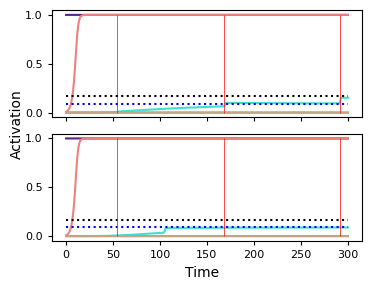

In [18]:
# demonstration of step-type

fig, axs = plt.subplots(2,1,figsize=(4,3),sharey="all",sharex="all")

axs[0] = step.PlotReceiverActivation(axs[0],perm=1,phase=2)
axs[0].vlines(step.ContactPoints2D[0][1].get_path().vertices[:,0],0,1,colors=[1,0,0],linewidth=.5)
axs[0].hlines(0.0892797,0,300,colors=[0,0,1],linestyles="dotted")
axs[0].hlines(0.165267,0,300,colors="0",linestyles="dotted")
axs[1] = step.PlotReceiverActivation(axs[1],perm=3,phase=2)
axs[1].hlines(0.0892797,0,300,colors=[0,0,1],linestyles="dotted")
axs[1].hlines(0.165267,0,300,colors="0",linestyles="dotted")
axs[1].vlines(step.ContactPoints2D[1][1].get_path().vertices[:,0],0,1,colors=[1,0,0],linewidth=.5)

axs[0].tick_params(labelsize=8,length=3)
axs[1].tick_params(labelsize=8,length=3)
fig.supxlabel("Time",fontsize=10,y=-.02)
fig.supylabel("Activation",fontsize=10)
fig.subplots_adjust(hspace=.15)

# os.chdir(BaseDirectory)
# fig.savefig('./Plots/Gaul.fig5.pdf',format="pdf",bbox_inches="tight",dpi=600)
# fig.savefig('./Plots/step-demo.jpeg',bbox_inches="tight",dpi=600)

plt.show()

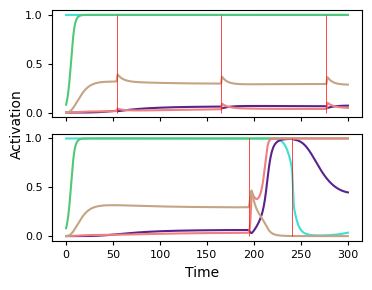

In [19]:
# demonstration of basin-type

fig, axs = plt.subplots(2,1,figsize=(4,3),sharey="all",sharex="all")

axs[0] = basin.PlotReceiverActivation(axs[0],perm=1,phase=2)
axs[0].vlines(basin.ContactPoints2D[0][1].get_path().vertices[:,0],0,1,colors=[1,0,0],linewidth=.5)
axs[1] = basin.PlotReceiverActivation(axs[1],perm=3,phase=2)
axs[1].vlines(basin.ContactPoints2D[1][1].get_path().vertices[:,0],0,1,colors=[1,0,0],linewidth=.5)

axs[0].tick_params(labelsize=8,length=3)
axs[1].tick_params(labelsize=8,length=3)
fig.supxlabel("Time",fontsize=10,y=-.02)
fig.supylabel("Activation",fontsize=10)
fig.subplots_adjust(hspace=.15)

# os.chdir(BaseDirectory)
# fig.savefig('./Plots/basin-demo.pdf',format="pdf",bbox_inches="tight",dpi=600)
# fig.savefig('./Plots/basin-demo.jpeg',bbox_inches="tight",dpi=600)

plt.show()

Annotated Heatmap of Contact Points

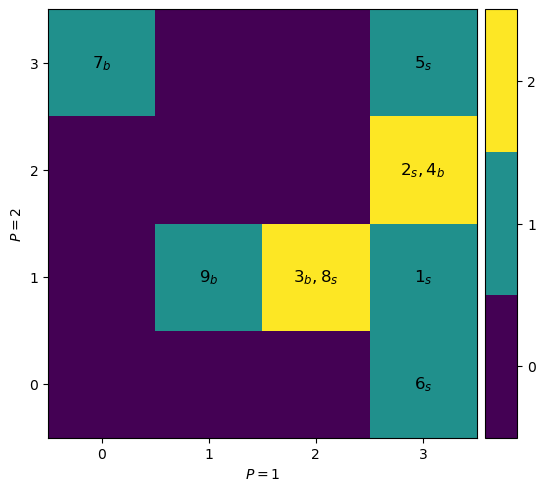

In [20]:
# annotated heatmap of contact points

fig = plt.figure(layout='constrained')

ax = fig.add_gridspec(top=0.75, right=0.75).subplots()
ax.set(aspect=1)

# plot pairwise contact data
p12 = [[p1_contact[i],p2_contact[i]] for i in range(len(pop))]
arr = np.zeros(shape=(4,4))
for idx in p12: arr[tuple(idx)] += 1
im = ax.imshow(arr.transpose())

# plot styling
ax.set_xlim([-.5,3.5])
ax.set_ylim([-.5,3.5])
ax.set_xticks(np.arange(0,4))
ax.set_yticks(np.arange(0,4))
ax.set_xlabel("$P=1$")
ax.set_ylabel("$P=2$")

# plot population indices on heatmap
text = np.array([[None,None,None,"$6_s$"],
                [None,"$9_b$","$3_b,8_s$","$1_s$"],
                [None,None,None,"$2_s,4_b$"],
                ["$7_b$",None,None,"$5_s$"]]
                )

for i in range(4):
    for j in range(4):
        ax.text(j,i,text[i,j],ha="center",va="center",
        color="0",fontsize=12,weight=700)


# color bar
cax = ax.inset_axes([1.02,0,.075,1])
cax.yaxis.tick_right()
cmap = mpl.cm.viridis
bounds = np.linspace(-1,3,4)
norm = mpl.colors.BoundaryNorm(bounds,cmap.N)
cb = plt.colorbar(im, cax=cax,ax=ax,
        norm=norm,boundaries=bounds,spacing='uniform')
cb.ax.set_yticks(np.linspace(-1,3,7)[1:7:2])
cb.ax.set_yticklabels([0,1,2])

# os.chdir(BaseDirectory)
# fig.savefig('./Plots/P2-contact-annotated.pdf',format="pdf",bbox_inches="tight",dpi=600)
# fig.savefig('./Plots/P2-contact_heatmap-annotated.jpeg',bbox_inches="tight",dpi=600)
plt.show()

All neuron plots of a receiver

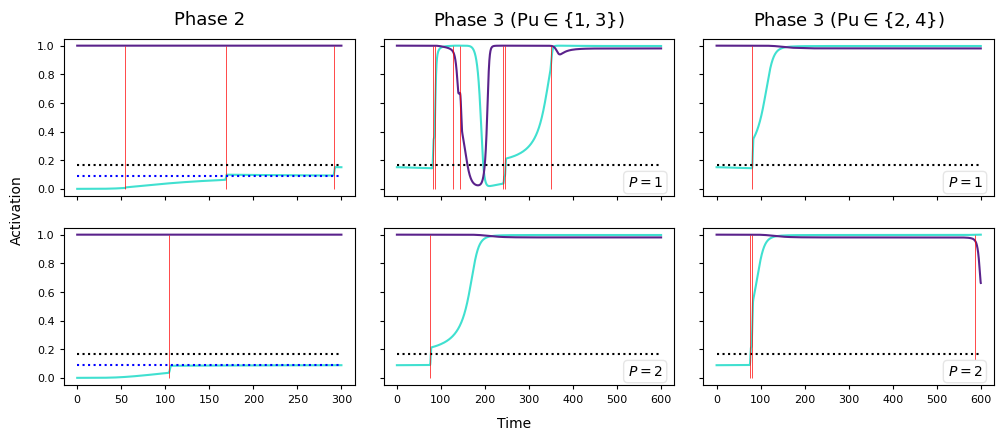

In [21]:
fig, axs = plt.subplots(2,3,figsize=(12,4.5),sharey="all",sharex="col")
bbox = dict(boxstyle='round',fc='1',edgecolor='0.9',alpha=1)

axs[0,0] = step.PlotReceiverActivation(axs[0,0],perm=1,phase=2,n=[1,2])
axs[0,0].vlines(step.ContactPoints2D[0][1].get_path().vertices[:,0],0,1,colors=[1,0,0],linewidth=.5)
axs[0,0].hlines(0.0892797,0,300,colors=[0,0,1],linestyles="dotted")
axs[0,0].hlines(0.165267,0,300,colors="0",linestyles="dotted")

axs[0,1] = step.PlotReceiverActivation(axs[0,1],perm=1,phase=3,n=[1,2])
axs[0,1].vlines(step.ContactPoints2D[0][2].get_path().vertices[:,0],0,1,colors=[1,0,0],linewidth=.5)
axs[0,1].hlines(0.165267,0,600,colors="0",linestyles="dotted")
axs[0,1].text(0.84,0.06,"$P=1$",transform=axs[0,1].transAxes,bbox=bbox)

axs[0,2] = step.PlotReceiverActivation(axs[0,2],perm=2,phase=3,n=[1,2])
axs[0,2].vlines(step.ContactPoints2D[1][2].get_path().vertices[:,0],0,1,colors=[1,0,0],linewidth=.5)
axs[0,2].hlines(0.165267,0,600,colors="0",linestyles="dotted")
axs[0,2].text(0.84,0.06,"$P=1$",transform=axs[0,2].transAxes,bbox=bbox)

axs[1,0] = step.PlotReceiverActivation(axs[1,0],perm=3,phase=2,n=[1,2])
axs[1,0].hlines(0.0892797,0,300,colors=[0,0,1],linestyles="dotted")
axs[1,0].hlines(0.165267,0,300,colors="0",linestyles="dotted")
axs[1,0].vlines(step.ContactPoints2D[2][1].get_path().vertices[:,0],0,1,colors=[1,0,0],linewidth=.5)

axs[1,1] = step.PlotReceiverActivation(axs[1,1],perm=3,phase=3,n=[1,2])
axs[1,1].hlines(0.165267,0,600,colors="0",linestyles="dotted")
axs[1,1].vlines(step.ContactPoints2D[2][2].get_path().vertices[:,0],0,1,colors=[1,0,0],linewidth=.5)
axs[1,1].text(0.84,0.06,"$P=2$",transform=axs[1,1].transAxes,bbox=bbox)

axs[1,2] = step.PlotReceiverActivation(axs[1,2],perm=4,phase=3,n=[1,2])
axs[1,2].hlines(0.165267,0,600,colors="0",linestyles="dotted")
axs[1,2].vlines(step.ContactPoints2D[3][2].get_path().vertices[:,0],0,1,colors=[1,0,0],linewidth=.5)
axs[1,2].text(0.84,0.06,"$P=2$",transform=axs[1,2].transAxes,bbox=bbox)

for i in range(2):
    for j in range(3):
        axs[i,j].tick_params(labelsize=8,length=3)
        axs[i,j].tick_params(labelsize=8,length=3)

axs[0,0].set_title("Phase 2",fontsize=13,pad=10)
axs[0,1].set_title("Phase 3 (Pu$\in\{1,3\}$)",fontsize=13,pad=10)
axs[0,2].set_title("Phase 3 (Pu$\in\{2,4\}$)",fontsize=13,pad=10)

fig.supxlabel("Time",fontsize=10,y=0.01)
fig.supylabel("Activation",fontsize=10,x=0.08)
fig.subplots_adjust(hspace=0.2,wspace=0.1)

# os.chdir(BaseDirectory)
# fig.savefig('./Plots/Gaul.fig4.pdf',format="pdf",bbox_inches="tight",dpi=600)
# fig.savefig('./Plots/step-demo.jpeg',bbox_inches="tight",dpi=600)

plt.show()

# Parameter Space

Connection Weights for Nine Unique Solutions

In [22]:
# reading weight matrices

os.chdir(BaseDirectory)
os.chdir("./EvoP2")
w = []
for a in range(9):
    os.chdir("./Pop-"+str(a+1))
    weights = np.loadtxt("phenotype.dat",dtype=float,delimiter=" ",
                     skiprows=2,max_rows=5,usecols=np.arange(0,5))
    w.append(np.flipud(np.swapaxes(weights,1,0)))
    os.chdir("../")

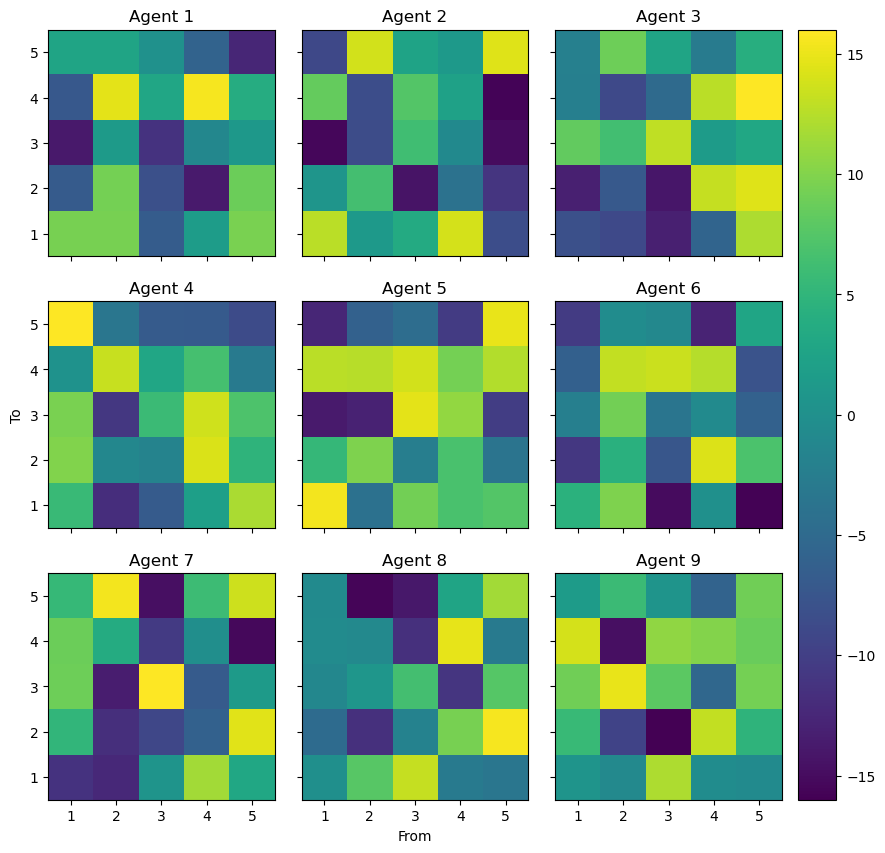

In [23]:
# plotting weight matrix heatmaps

fig, axs = plt.subplots(3,3,figsize=(12,10),sharex="all",sharey="all")

i = 1
for ax in np.ravel(axs):
    im = ax.imshow(w[i-1],vmin=-16,vmax=16,extent=(.5,5.5,.5,5.5))

    ax.set_xlim([.5,5.5])
    ax.set_ylim([.5,5.5])
    ax.set_xticks(np.arange(1,6))
    ax.set_yticks(np.arange(1,6))
    
    ax.set_title("Agent "+str(i))
    i += 1
    continue

axs[1,0].set_ylabel("To")
axs[2,1].set_xlabel("From")

fig.colorbar(im,ax=axs,fraction=.1,anchor=(2,0))
fig.subplots_adjust(hspace=.2,wspace=-.4)

# os.chdir(BaseDirectory)
# fig.savefig("./Plots/WeightMatrices.jpeg",dpi=600,bbox_inches="tight")
plt.show()

Time-constants

In [24]:
# time constant

taus = np.empty((5,9),dtype=float)
col = []
os.chdir(BaseDirectory)
os.chdir("./EvoP2")
for i in range(9):
    os.chdir("./Pop-"+str(i+1))
    tau = np.loadtxt("phenotype.dat",delimiter=" ",max_rows=1,usecols=np.arange(0,5))
    taus[:,i] = tau
    os.chdir("../")
    col.append("Agent"+str(i+1))

taus = pd.DataFrame(taus,
            index=["tau1","tau2","tau3","tau4","tau5"],columns=col)
taus

,Agent1,Agent2,Agent3,Agent4,Agent5,Agent6,Agent7,Agent8,Agent9
tau1,29.980831,1.947909,20.700323,23.248312,2.106393,16.299001,28.323176,5.481414,27.178517
tau2,16.657316,6.291717,6.506404,23.443493,24.515665,9.774573,28.695276,26.963555,12.048855
tau3,2.053628,14.844667,16.981291,20.592416,29.198222,19.174387,5.267872,28.833765,7.131455
tau4,29.967839,29.924267,23.822768,11.698196,21.062664,25.471607,25.252222,3.542517,10.954961
tau5,6.260789,16.843348,18.739155,21.026248,9.363426,23.989837,1.043674,2.047132,15.315730


In [25]:
# agents with step dynamics
step = [[1,1],[2,4],[5,2],[6,5],[8,3]]
mean_tau = 0

print("Agent ","\tStep N "," Tau")
for a in step:
    print("Agent "+str(a[0])+": ","N"+str(a[1])+"\t",taus["Agent"+str(a[0])][a[1]-1])
    mean_tau += taus["Agent"+str(a[0])][a[1]-1]
print("Average: ",mean_tau/len(step))

Agent  	Step N   Tau
Agent 1:  N1	 29.980831
Agent 2:  N4	 29.9242665
Agent 5:  N2	 24.515665
Agent 6:  N5	 23.989837
Agent 8:  N3	 28.833765
Average:  27.448872899999998
